In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("crisil_df_with_predictions.csv")
df.head()

,Company Name,Sector classification,Listed/Unlisted,Environment Score,Social Score,Governance Score,ESG Score,Category,Linear Regression Predictions,Random Forest Predictions
0,360 One Wam Limited,Financial Services,Listed,48,50,69,57,Adequate,84.919790,0.915137
1,3M India Limited,Industrial and capital goods,Listed,41,46,69,54,Adequate,84.927339,0.915137
2,Aadhar Housing Finance Limited,Lending,Unlisted,62,53,64,61,Strong,78.903546,0.915137
3,Aarti Industries Limited,Chemical,Listed,42,60,59,53,Adequate,74.128916,0.915137
4,AAVAS Financiers Limited,Lending,Listed,62,59,72,66,Strong,89.249348,0.915137


In [3]:
# Filter the dataframe to keep only rows where 'Listed/Unlisted' is 'Listed'
df = df[df['Listed/Unlisted'] == 'Listed']

In [4]:
df.head()

,Company Name,Sector classification,Listed/Unlisted,Environment Score,Social Score,Governance Score,ESG Score,Category,Linear Regression Predictions,Random Forest Predictions
0,360 One Wam Limited,Financial Services,Listed,48,50,69,57,Adequate,84.919790,0.915137
1,3M India Limited,Industrial and capital goods,Listed,41,46,69,54,Adequate,84.927339,0.915137
3,Aarti Industries Limited,Chemical,Listed,42,60,59,53,Adequate,74.128916,0.915137
4,AAVAS Financiers Limited,Lending,Listed,62,59,72,66,Strong,89.249348,0.915137
5,ABB India Limited,Industrial and capital goods,Listed,58,56,70,62,Strong,86.237160,0.915137


In [5]:
company_names = df['Company Name'].unique()
for name in company_names:
    print(name)

360 One Wam Limited
3M India Limited
Aarti Industries Limited
AAVAS Financiers Limited
ABB India Limited
Abbott India Limited
ACC Limited
Action Construction Equipment Limited
Adani Enterprises Limited
Adani Green Energy Limited
Adani Ports and Special Economic Zone Limited
Adani Power Limited
Adani Total Gas Limited
Adani Transmission Limited
Aditya Birla Capital Limited
Aditya Birla Fashion and Retail Limited
Aditya Birla Sun Life AMC Limited
Advanced Enzyme Technologies Limited
Affle (India) Limited
Ahluwalia Contracts India Limited
AIA Engineering Limited
Ajanta Pharma Limited
Akzo Nobel India Limited
Alembic Limited
Alembic Pharmaceuticals Limited
Alkem Laboratories Limited
Amara Raja Batteries Limited
Amber Enterprises India Limited
Ambuja Cements Limited
Angel One Limited
Apar Industries Limited
APL Apollo Tubes Limited
Apollo Tyres Limited
Arvind Fashions Limited
Arvind Limited
Ashok Leyland Limited
Ashoka Buildcon Limited
Asian Paints Limited
Aster DM Healthcare Limited
Astral

In [6]:
m1= df['Linear Regression Predictions'].max()
m2 = df['Random Forest Predictions'].max()
m3 = df['Linear Regression Predictions'].min()
m4 = df['Random Forest Predictions'].min()
print(m1,m3,m2,m4)

100.50074399437824 49.567831828453336 0.9151371772299997 0.9151371772299997


In [7]:
df_csr = pd.read_csv("csr_spend22.csv")
df_csr.head()

,CSR Journal Rank,Company Name,Spend on CSR,Required,Custom Score
0,1,Reliance Industries Limited,1186.00,1112.00,6.65
1,2,Tata Consultancy Services Limited,727.00,716.00,1.54
2,3,HDFC Bank Limited,733.86,733.86,0.00
3,4,ICICi Bank Limited,266.62,259.61,2.70
4,5,Infosys Limited,344.91,396.70,-13.06


In [8]:
merged_df = df.merge(df_csr, on="Company Name", how="inner")
merged_df.replace("#VALUE!", 0, inplace=True)

In [9]:
merged_df.head()

,Company Name,Sector classification,Listed/Unlisted,Environment Score,Social Score,Governance Score,ESG Score,Category,Linear Regression Predictions,Random Forest Predictions,CSR Journal Rank,Spend on CSR,Required,Custom Score
0,Adani Enterprises Limited,Logistics,Listed,33,52,50,44,Below Average,62.722819,0.915137,9,12.87,NaN,0
1,Adani Power Limited,Power Thermal,Listed,47,51,62,54,Adequate,76.661458,0.915137,43,0.15,0.00,0.00
2,Ambuja Cements Limited,Cement,Listed,50,58,69,60,Adequate,85.853263,0.915137,46,64.41,36.59,76.03
3,Bajaj Auto Limited,Auto OEM,Listed,40,47,70,54,Adequate,86.143717,0.915137,50,75.66,126.66,-40.27
4,Bajaj Finance Limited,Lending,Listed,63,64,71,67,Strong,88.484737,0.915137,12,60.01,120.89,-50.36


In [10]:
columns_to_drop = ['Environment Score', 'Social Score', 'Governance Score', 'ESG Score', 'Category', 'Random Forest Predictions']

# Use the drop method to remove the specified columns
merged_df = merged_df.drop(columns=columns_to_drop)

In [11]:
merged_df.head()

,Company Name,Sector classification,Listed/Unlisted,Linear Regression Predictions,CSR Journal Rank,Spend on CSR,Required,Custom Score
0,Adani Enterprises Limited,Logistics,Listed,62.722819,9,12.87,NaN,0
1,Adani Power Limited,Power Thermal,Listed,76.661458,43,0.15,0.00,0.00
2,Ambuja Cements Limited,Cement,Listed,85.853263,46,64.41,36.59,76.03
3,Bajaj Auto Limited,Auto OEM,Listed,86.143717,50,75.66,126.66,-40.27
4,Bajaj Finance Limited,Lending,Listed,88.484737,12,60.01,120.89,-50.36


In [12]:
merged_df.to_csv('merged.csv', index=False)

In [13]:
list(merged_df)

['Company Name',
 'Sector classification',
 'Listed/Unlisted',
 'Linear Regression Predictions',
 'CSR Journal Rank',
 'Spend on CSR',
 'Required',
 'Custom Score']

In [14]:
# Sort the DataFrame based on "CSR Journal Rank"
merged_df.sort_values(by='CSR Journal Rank', ascending=True, inplace=True)

# Create rank columns based on "Linear Regression Predictions" and "Custom Score" after sorting
merged_df['Linear Regression Rank'] = merged_df['Linear Regression Predictions'].rank(ascending=False, method='min')
merged_df['Custom Score Rank'] = merged_df['Custom Score'].rank(ascending=False, method='min', na_option='bottom')

# Now, merged_df contains two new rank columns for the specified scores based on the sorted "CSR Journal Rank"


/var/folders/2l/q8wm67_x5yn9qtfylfw_gktc0000gn/T/ipykernel_32915/4171457165.py:6: FutureWarning: Dropping of nuisance columns in Series.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  merged_df['Custom Score Rank'] = merged_df['Custom Score'].rank(ascending=False, method='min', na_option='bottom')
/var/folders/2l/q8wm67_x5yn9qtfylfw_gktc0000gn/T/ipykernel_32915/4171457165.py:6: FutureWarning: Calling Series.rank with numeric_only=True and dtype object is deprecated and will raise a TypeError in a future version of pandas
  merged_df['Custom Score Rank'] = merged_df['Custom Score'].rank(ascending=False, method='min', na_option='bottom')


In [15]:
# Sort the DataFrame based on "CSR Journal Rank"
merged_df.sort_values(by='CSR Journal Rank', ascending=True, inplace=True)

# Calculate rank based on "Custom Score" manually, handling negative values
custom_score_rank = 1  # Initialize the rank
previous_custom_score = None  # Initialize the previous custom score

# Create a list to store the custom score ranks
custom_score_ranks = []

for custom_score in merged_df['Custom Score']:
    if custom_score != previous_custom_score:
        custom_score_rank += 1  # Increment rank for unique values
    custom_score_ranks.append(custom_score_rank)
    previous_custom_score = custom_score

# Add the custom score ranks to the DataFrame
merged_df['Custom Score Rank'] = custom_score_ranks

# Now, merged_df contains the manually calculated rank based on "Custom Score"


In [16]:
merged_df.head()

,Company Name,Sector classification,Listed/Unlisted,Linear Regression Predictions,CSR Journal Rank,Spend on CSR,Required,Custom Score,Linear Regression Rank,Custom Score Rank
18,Reliance Industries Limited,Diversified,Listed,91.532893,1,1186.00,1112.00,6.65,8.0,2
22,Tata Consultancy Services Limited,IT,Listed,96.494667,2,727.00,716.00,1.54,4.0,3
8,HDFC Bank Limited,Lending,Listed,100.500744,3,733.86,733.86,0.00,1.0,4
12,Infosys Limited,IT,Listed,98.181854,5,344.91,396.70,-13.06,3.0,5
10,Hindustan Unilever Limited,FMCG,Listed,95.861163,6,184.43,157.58,17.04,5.0,6


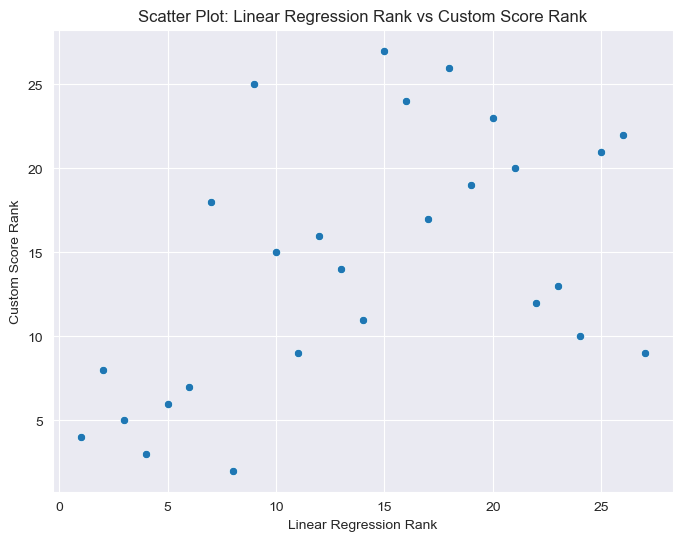

Correlation between Linear Regression Rank and Custom Score Rank: 0.50


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot between Linear Regression Rank and Custom Score Rank
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Linear Regression Rank', y='Custom Score Rank')
plt.title('Scatter Plot: Linear Regression Rank vs Custom Score Rank')
plt.xlabel('Linear Regression Rank')
plt.ylabel('Custom Score Rank')
plt.show()

# Calculate and display the correlation between Linear Regression Rank and Custom Score Rank
correlation_custom_score = merged_df['Linear Regression Rank'].corr(merged_df['Custom Score Rank'])
print(f"Correlation between Linear Regression Rank and Custom Score Rank: {correlation_custom_score:.2f}")

In [20]:
# Create a copy of the merged_df DataFrame
cleaned_merged_df = merged_df.copy()

# Convert the "Custom Score" column to a numeric data type (float)
cleaned_merged_df['Custom Score'] = cleaned_merged_df['Custom Score'].astype(float)

# Drop rows with negative values in the "Custom Score" column
cleaned_merged_df = cleaned_merged_df[cleaned_merged_df['Custom Score'] >= 0]

# Now, cleaned_merged_df contains only rows with non-negative values in the "Custom Score" column



In [21]:
# Sort the DataFrame based on "CSR Journal Rank"
cleaned_merged_df.sort_values(by='CSR Journal Rank', ascending=True, inplace=True)

# Create rank columns based on "Linear Regression Predictions" and "Custom Score" after sorting
cleaned_merged_df['Linear Regression Rank'] = cleaned_merged_df['Linear Regression Predictions'].rank(ascending=False, method='min')
cleaned_merged_df['Custom Score Rank'] = cleaned_merged_df['Custom Score'].rank(ascending=False, method='min', na_option='bottom')

# Now, merged_df contains two new rank columns for the specified scores based on the sorted "CSR Journal Rank"


In [22]:
# Sort the DataFrame based on "CSR Journal Rank"
cleaned_merged_df.sort_values(by='CSR Journal Rank', ascending=True, inplace=True)

# Calculate rank based on "Custom Score" manually, handling negative values
custom_score_rank = 1  # Initialize the rank
previous_custom_score = None  # Initialize the previous custom score

# Create a list to store the custom score ranks
custom_score_ranks = []

for custom_score in cleaned_merged_df['Custom Score']:
    if custom_score != previous_custom_score:
        custom_score_rank += 1  # Increment rank for unique values
    custom_score_ranks.append(custom_score_rank)
    previous_custom_score = custom_score

# Add the custom score ranks to the DataFrame
cleaned_merged_df['Custom Score Rank'] = custom_score_ranks

# Now, merged_df contains the manually calculated rank based on "Custom Score"


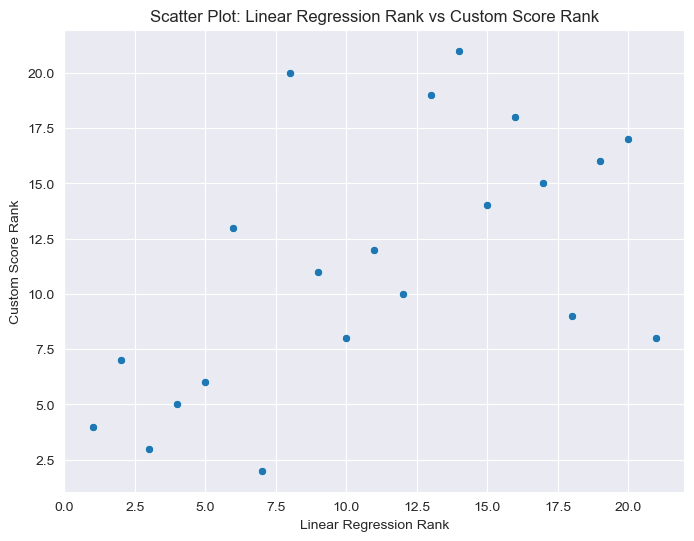

Correlation between Linear Regression Rank and Custom Score Rank: 0.57


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot between Linear Regression Rank and Custom Score Rank
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_merged_df, x='Linear Regression Rank', y='Custom Score Rank')
plt.title('Scatter Plot: Linear Regression Rank vs Custom Score Rank')
plt.xlabel('Linear Regression Rank')
plt.ylabel('Custom Score Rank')
plt.show()

# Calculate and display the correlation between Linear Regression Rank and Custom Score Rank
correlation_custom_score = cleaned_merged_df['Linear Regression Rank'].corr(cleaned_merged_df['Custom Score Rank'])
print(f"Correlation between Linear Regression Rank and Custom Score Rank: {correlation_custom_score:.2f}")